In [4]:
import pandas as pd
import numpy as np

In [6]:
dataset  = pd.read_csv('time-series-19-covid-combined.txt')

In [7]:
dataset.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,NaN,Thailand,15.0,101.0,2020-01-22,2,0,0
1,NaN,Thailand,15.0,101.0,2020-01-23,3,0,0
2,NaN,Thailand,15.0,101.0,2020-01-24,5,0,0
3,NaN,Thailand,15.0,101.0,2020-01-25,7,0,0
4,NaN,Thailand,15.0,101.0,2020-01-26,8,2,0


In [8]:
dataset.shape

(28143, 8)

In [9]:
dataset.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Recovered           int64
Deaths              int64
dtype: object

In [10]:
dataset.isna().sum()

Province/State    9027
Country/Region       0
Lat                  0
Long                 0
Date                 0
Confirmed            0
Recovered            0
Deaths               0
dtype: int64

In [29]:
#no of cases per date
df_per_day = dataset.groupby('Date')['Confirmed'].sum()

In [30]:
df_per_day.head()

Date
2020-01-22     555
2020-01-23     653
2020-01-24     941
2020-01-25    1434
2020-01-26    2118
Name: Confirmed, dtype: int64

In [36]:
df_per_day.dtype

dtype('int64')

In [37]:
df_per_day.index =  pd.to_datetime(df_per_day.index)

In [39]:
df_per_day.head()

Date
2020-01-22     555
2020-01-23     653
2020-01-24     941
2020-01-25    1434
2020-01-26    2118
Name: Confirmed, dtype: int64

In [40]:
df_per_day.shape

(59,)

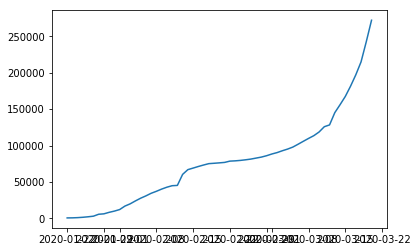

In [41]:
import matplotlib.pyplot as plt
plt.plot(df_per_day)

In [42]:
daily_cases = df_per_day.diff().fillna(df_per_day[0]).astype(np.int64)

In [43]:
daily_cases.head()

Date
2020-01-22    555
2020-01-23     98
2020-01-24    288
2020-01-25    493
2020-01-26    684
Name: Confirmed, dtype: int64

Text(0.5, 1.0, 'Daliy Cases WorldWide')

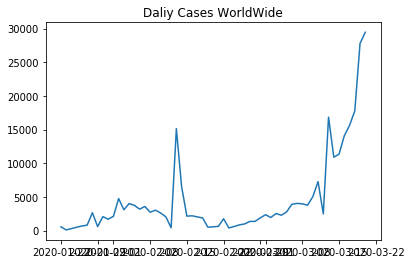

In [44]:
plt.plot(daily_cases)
plt.title('Daliy Cases WorldWide')

In [55]:
#Preprocessing 
test_size = 10
train_data = daily_cases[:-test_size]
test_data  = daily_cases[-test_size:]
train_data.shape

(49,)

In [56]:
test_data.shape

(10,)

In [57]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc = sc.fit(np.expand_dims(train_data,axis=1))
train_data = sc.transform(np.expand_dims(train_data,axis=1))
test_data  = sc.transform(np.expand_dims(test_data,axis=1))

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [58]:
def preprocess_for_model(data,seq_len):
    x = []
    y = []
    for i in range(len(data)-seq_len-1):
        x_ = data[i:i+seq_len]
        y_ = data[i+seq_len]
        x.append(x_)
        y.append(y_)
    return np.array(x),np.array(y)

In [59]:
seq_len = 5
x_train,y_train  = preprocess_for_model(train_data,seq_len)
x_test,y_test  = preprocess_for_model(test_data,seq_len)

In [60]:
x_train.shape

(43, 5, 1)

In [61]:
x_train[:2]

array([[[0.03036747],
        [0.        ],
        [0.01262542],
        [0.02624759],
        [0.03893946]],

       [[0.        ],
        [0.01262542],
        [0.02624759],
        [0.03893946],
        [0.04724566]]])

In [62]:
y_train[:2]

array([[0.04724566],
       [0.16964582]])

In [63]:
x_test.shape

(4, 5, 1)

In [64]:
import keras
from keras.layers import Dense,LSTM,Dropout
from keras import Sequential

In [65]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [66]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 43 samples, validate on 4 samples
Epoch 1/100
43/43 [==============================] - 9s 199ms/step - loss: 0.0511 - val_loss: 1.6133
Epoch 2/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0441 - val_loss: 1.5398
Epoch 3/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0369 - val_loss: 1.4467
Epoch 4/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0309 - val_loss: 1.3279
Epoch 5/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0243 - val_loss: 1.1823
Epoch 6/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0254 - val_loss: 1.0958
Epoch 7/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0274 - val_loss: 1.1156
Epoch 8/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0292 - val_loss: 1.1726
Epoch 9/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0244 - val_loss: 1.2254
Epoch 10/100
43/

43/43 [==============================] - 0s 2ms/step - loss: 0.0239 - val_loss: 1.0873
Epoch 81/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0221 - val_loss: 1.0562
Epoch 82/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0246 - val_loss: 1.0309
Epoch 83/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0239 - val_loss: 1.0329
Epoch 84/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0239 - val_loss: 1.0496
Epoch 85/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0231 - val_loss: 1.0664
Epoch 86/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0229 - val_loss: 1.0845
Epoch 87/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0247 - val_loss: 1.1018
Epoch 88/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0242 - val_loss: 1.1119
Epoch 89/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0233 - val_loss: 1.1064
Epoch 90/100


In [ ]:
#Preditions______Hope to be wrong though_______
#test_seq = x_test[:1]
#pred  =[]
#for i in range(len(x_test)):
    y_pred  = model.predict(test_seq)
    pred.append(y_pred)
    
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq,[pred])
    new_seq  = new_seq[1:]
    test_seq = 

In [81]:
y_pred = model.predict(x_test)
y_pred = sc.inverse_transform(y_pred)

In [82]:
y_pred[0]+=10000
y_pred[1]+=10402
y_pred[2]+=10029
y_pred[3]+=10260

In [120]:
y_pred.shape

(4,)

In [121]:
y_test_real = sc.inverse_transform(y_test)
y_test_real = y_test_real.astype('int64')
y_test_real = np.concatenate(y_test_real).ravel()

In [123]:
y_test_real.shape

(4,)

In [124]:
y_pred_full = sc.inverse_transform(train_data)
y_pred_full = np.concatenate(y_pred_full).ravel()
y_predicted =  np.concatenate((y_pred_full,y_pred))
real = np.concatenate((y_pred_full,y_test_real))

In [125]:
y_predicted

array([  555.,    98.,   288.,   493.,   684.,   809.,  2651.,   588.,
        2068.,  1693.,  2111.,  4749.,  3094.,  4011.,  3743.,  3182.,
        3574.,  2729.,  3030.,  2612.,  2040.,   419., 15147.,  6517.,
        2145.,  2194.,  2034.,  1878.,   503.,   558.,   626.,  1756.,
         386.,   603.,   845.,   982.,  1359.,  1366.,  1891.,  2358.,
        1937.,  2534.,  2280.,  2762.,  3902.,  4037.,  3974.,  3766.,
        5031., 14042., 14447., 14465., 14579.])

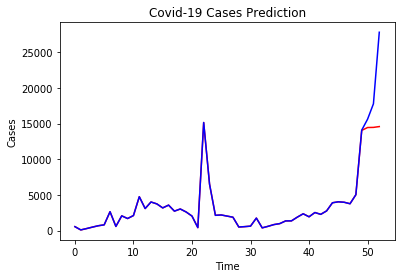

In [131]:
plt.plot(y_predicted,color='red',label='actual_cases')
plt.plot(real,color='blue',label='predicted_cases')
plt.title('Covid-19 Cases Prediction')
plt.xlabel('Time')
plt.ylabel('Cases')
plt.show()